# <center>__MÉTODOS NUMÉRICOS__</center>
## <center>__PROJETO DA UNIDADE 2__</center>

#### <center>__ALUNO: Antonio Gabriel Araújo Silva__</center>

<div class="alert alert-block alert-info">
1. INTRODUÇÃO
</div>

O presente projeto irá introduzir o **algoritmo de PageRank**. De início, o PageRank é um algoritmo fortemente utilizado pela Pesquisa do Google com objetivo de classificar sites nos resultados de seus mecanismos de pesquisa. Sendo assim, é uma maneira de fazer uma métrica em relação a relevancia das páginas do site. O Google apresenta o [PageRank](https://web.archive.org/web/20111104131332/https://www.google.com/competition/howgooglesearchworks.html) como: 

> PageRank works by counting the number and quality of links to a page to determine a rough estimate of how important the website is. The underlying assumption is that more important websites are likely to receive more links from other websites.

Relativo a implementação do algoritmo, irá ser utilizado a biblioteca **networkx**, para o entendimento será necessário alguns conceitos relativos a matrizes, ou mais especificamente **matriz de links** a qual será explicado em tópicos mais a frente nesse mesmo trabalho. Por fim, será gerado uma distribuição de probabilidade usada para representar a chance de uma pessoa clicar aleatoriamente em um ou mais de um link e com isso chegar a qualquer página em particular. 

Segue abaixo o algoritmo implementando pela biblioteca **networkx**:

In [63]:
def pagerank(G, alpha=0.85, personalization=None, 
             max_iter=100, tol=1.0e-6, nstart=None, weight='weight', 
             dangling=None): 
    
    if len(G) == 0: 
        return {} 
  
    if not G.is_directed(): 
        D = G.to_directed() 
    else: 
        D = G 
  
    # Create a copy in (right) stochastic form 
    W = nx.stochastic_graph(D, weight=weight) 
    N = W.number_of_nodes() 
  
    # Choose fixed starting vector if not given 
    if nstart is None: 
        x = dict.fromkeys(W, 1.0 / N) 
    else: 
        # Normalized nstart vector 
        s = float(sum(nstart.values())) 
        x = dict((k, v / s) for k, v in nstart.items()) 
  
    if personalization is None: 
  
        # Assign uniform personalization vector if not given 
        p = dict.fromkeys(W, 1.0 / N) 
    else: 
        missing = set(G) - set(personalization) 
        if missing: 
            raise NetworkXError('Personalization dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing) 
        s = float(sum(personalization.values())) 
        p = dict((k, v / s) for k, v in personalization.items()) 
  
    if dangling is None: 
  
        # Use personalization vector if dangling vector not specified 
        dangling_weights = p 
    else: 
        missing = set(G) - set(dangling) 
        if missing: 
            raise NetworkXError('Dangling node dictionary '
                                'must have a value for every node. '
                                'Missing nodes %s' % missing) 
        s = float(sum(dangling.values())) 
        dangling_weights = dict((k, v/s) for k, v in dangling.items()) 
    dangling_nodes = [n for n in W if W.out_degree(n, weight=weight) == 0.0] 
  
    # power iteration: make up to max_iter iterations 
    for _ in range(max_iter): 
        xlast = x 
        x = dict.fromkeys(xlast.keys(), 0) 
        danglesum = alpha * sum(xlast[n] for n in dangling_nodes) 
        for n in x: 
  
            # this matrix multiply looks odd because it is 
            # doing a left multiply x^T=xlast^T*W 
            for nbr in W[n]: 
                x[nbr] += alpha * xlast[n] * W[n][nbr][weight] 
            x[n] += danglesum * dangling_weights[n] + (1.0 - alpha) * p[n] 
  
        # check convergence, l1 norm 
        err = sum([abs(x[n] - xlast[n]) for n in x]) 
        if err < N*tol: 
            return x 
    raise NetworkXError('pagerank: power iteration failed to converge '
                        'in %d iterations.' % max_iter) 

<div class="alert alert-block alert-info">
2. DESCRIÇÃO DO PROBLEMA
</div>

Como já citado, o algoritmo PageRank gera uma distribuição de probabilidade usada para representar a probabilidade de uma pessoa clicar aleatoriamente nos links chegar a qualquer página em particular. Portanto, a saída será um vetor cujo somatório dos componentes é igual a 1.

Vale destacar que tal algoritmo apresenta desafios como: 
> Problema: Qual a probabilidade de um utilizador, percorrendo ligações aleatoriamente, chegue a uma determinada página considerando que, por exemplo, o site B, C e D tem uma referência para o site A?  

> Problema: Qual a probabilidade de um utilizador, percorrendo ligações aleatoriamente, chegue a uma determinada página considerando que, por exemplo, o site A, B, C e D tem rerências entre si?  

<div class="alert alert-block alert-info">
3. MÉTODOS APLICADOS À SOLUÇÃO
</div>

O uso da biblioteca networkx foi utilizado para a resolução do questionamento levantado na seção anterior. As ferramentas que a biblioteca traz consigo nos permite criar **nós** e **arestas** além de definir pesos para essas ligações, bem como definir o fator de amortecimento já citado. Além de que, para confirmar a veracidade utilizaremos o numpy para fazer uma comparação de resultados, mostrando que a saída de ambas soluções (um vetor cujo somatório das componentes é igual a 1) são iguais.

<div class="alert alert-block alert-info">
4. IMPLEMENTAÇÃO 
</div>

Abaixo segue o uso da biblioteca networkx.

In [64]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Inicialmente, vamos criar nossos sites A, B, C e D sem ligações entre eles, a idéia é que, no momento, todos eles sejam igualmente importantes.

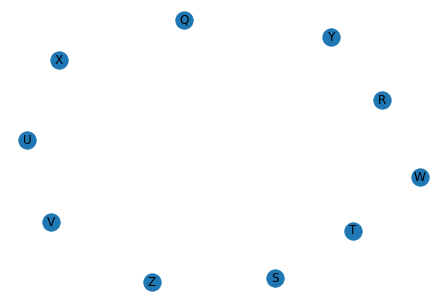

In [65]:
di_graph = nx.DiGraph()
di_graph.add_nodes_from("QRSTUVWXYZ")
nx.draw(di_graph,with_labels=True)

In [66]:
plt.show()

Por conseguinte, a saída será um vetor cujo somatório dos componentes é igual ou aproximadamente ao valor 1.

**Observação**: o sera chamado de parâmetro _alfa_ o fator de amortecimento. Já que, como já citado, o algoritmo deve levar em consideração o fato de que um usuário imaginário que clica aleatoriamente nos links pode acabar parando de clicar. Essa probabilidade o **Google o definiu 0,85** como *default*.

In [67]:
alpha = 0.85
pr = nx.pagerank(di_graph, alpha=alpha)
print(pr)
print("Soma dos valores:", sum(pr.values()))

{'Q': 0.09999999999999999, 'R': 0.09999999999999999, 'S': 0.09999999999999999, 'T': 0.09999999999999999, 'U': 0.09999999999999999, 'V': 0.09999999999999999, 'W': 0.09999999999999999, 'X': 0.09999999999999999, 'Y': 0.09999999999999999, 'Z': 0.09999999999999999}
Soma dos valores: 0.9999999999999999


O parâmetro alpha acima, com algumas pesquisas feitas, o google atribuiu **0.85** o valor padrão, esse dado é chamado de **fator de amortecimento** e o algoritmo do PageRank o leva em consideração já que existe o ponto de que um usuário imaginário que irá clicar aleatoriamente nos links pode simplesmente acabar parando de clicar, esse valor corresponde as chances disso.

Adicionando agora ligações entre nossos 'sites'.

In [68]:
di_graph.add_weighted_edges_from([("Q", "R", 1),("R", "S", 1),("S", "T", 1),("T", "U", 1),("U", "V", 1),("V", "W", 1), ("W", "X", 1), ("X", "Y", 1), ("Y","Z",1), ("Z","Q",1)]) 

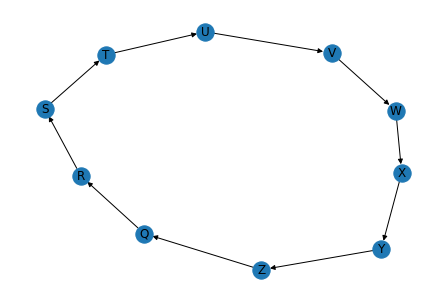

In [69]:
nx.draw(di_graph,with_labels=True)

A partir disso, para entender melhor como ocorre a lógica do PageRank, como já dito na introdução, é necessário entrar em um conceito chamado de **matriz de links**. Isso. trata-se de uma **matriz quadrada** com dimensões iguais ao número de nós e descreve, para cada nó, seus links interno e externo. Podemos ler a matriz em duas direções: 

    - Por Linhas: Mostra quais são os links internos para cada nó
    - Por Colunas: Mostra quaiss ão os links externos para cada nó

Se um nó tiver $k$ arestas de saída, ele passará $\frac{1}{k}$ de sua importância para cada um dos nós aos quais está vinculado.

In [70]:
matriz_a=np.matrix([(0,0,0,1),(1,0,0,0),(0,1,0,0),(0,0,1,0)])
matriz_a

matrix([[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]])

In [71]:
di_graph_test = nx.DiGraph()
di_graph_test.add_nodes_from(['A','B','C','D'])
di_graph_test.add_weighted_edges_from([('A','C',1), ('A','D',1),('A','B',1),('B','C',1),('B','D',1),('C','A',1),('D','A',1),('D','C',1)])

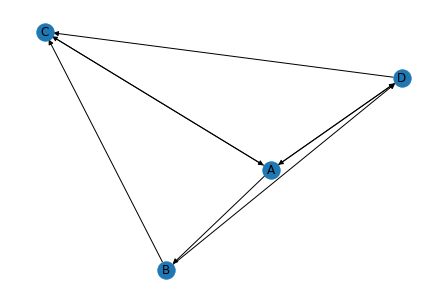

In [72]:
nx.draw(di_graph_test, with_labels=True)

A matriz de links terá a seguinte aparência:

In [73]:
matriz = np.matrix([(0,0,1,0.5),(1/3,0,0,0),(1/3,0.5,0,0.5),(1/3,0.5,0,0)])
matriz

matrix([[0.        , 0.        , 1.        , 0.5       ],
        [0.33333333, 0.        , 0.        , 0.        ],
        [0.33333333, 0.5       , 0.        , 0.5       ],
        [0.33333333, 0.5       , 0.        , 0.        ]])

Agora, aplicando o algoritmo PageRank (definindo o fator de amortecimento que será chamado de alpha e de valor igual 1, para que com isso consideremos que o usuário não irá parar de clicar nos links)

In [74]:
pr=nx.pagerank(di_graph_test,alpha=1)
print(pr)
print("Soma dos valores:", sum(pr.values()),"é igual o aproximadamente 1")

{'A': 0.38709615908859496, 'B': 0.12903204605249047, 'C': 0.29032302109901886, 'D': 0.193548773759895}
Soma dos valores: 0.9999999999999992 é igual o aproximadamente 1


O mesmo resultado é obtido ainda que se tenha k iteração igual a, por exemplo, 5000, para atualizar nosso vetor de classificação:

In [75]:
k = 5000
np_array = np.array((matriz**k)*matriz_a.T)
np_array

array([[0.38709677, 0.38709677, 0.38709677, 0.38709677],
       [0.12903226, 0.12903226, 0.12903226, 0.12903226],
       [0.29032258, 0.29032258, 0.29032258, 0.29032258],
       [0.19354839, 0.19354839, 0.19354839, 0.19354839]])

<div class="alert alert-block alert-info">

5. CASOS DE USO
</div>

Algoritmo em uma rede de maior complexidade, ou seja, com mais nós (sites):

In [76]:
G=nx.fast_gnp_random_graph(25,0.5,directed=True)

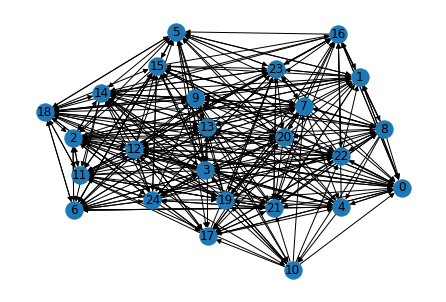

In [77]:
nx.draw(G,with_labels=True)

In [78]:
page_rank=nx.pagerank(G,alpha=0.85)
v=np.array([[*pr.values()]])

##### Nó mais popular

In [79]:
np.argmax(v)

0

Nó menos popular

In [80]:
np.argmin(v)

1